<h1><center>Star Wars Survey</center></h1>

While waiting for the movie to arrive: *Star Wars: The Force Awakens*, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in the survey about *Star Wars* fans. In particular, they wondered: How many people are "Star Wars" fans? Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch? Which characters are most well-liked and most hated? And who shot first, Han Solo or Greedo?

<img src="https://media.gettyimages.com/photos/space-exploration-and-planetary-colonization-picture-id501940544?k=20&m=501940544&s=612x612&w=0&h=YXiNAtSZZiMv5Bo_b3Bet9A5O0w0qfLfjzbJJ3WbmMA="/>

*Source*: [gettyimages](https://www.gettyimages.com/)

The team used the online tool SurveyMonkey to collect the data from *Star War* fans. The survey received 1,186 responses from June 3 to 6, which are available on [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Project and Data Overview

For this project, we'll clean and explore the dataset to analyze the fan's responses we got about the Star Wars franchise and the movie itself.

from Star Wars fans.

The dataset has several columns, including the following:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - the respondent's gender
- `Age` - the respondent's age
- `Household Income` - the respondent's income
- `Education` - the respondent's eduction level
- `Location (Census Region)` - the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise` - a `Yes` or `No` respone
- `Do you consider yourself to be a fan of the Star Wars film franchise` - a `Yes` or `No` response

There are several other columns containing answers to questions aobut the *Star Wars* movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## Import Libraries and Load the Dataset

We need to specify an `encoding=ISO-8859-1`, because the dataset has some characters that aren't in Python's default `utf-8` encoding.

Let's import the required libraries and read in the data to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

In [2]:
# Read the data
star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')

# Display number of total rows and columns
print(f'Total number of rows: {star_wars.shape[0]}')
print(f'Total number of columns: {star_wars.shape[1]}')

# Explore the data by viewing first ten rows
star_wars.head(10)

Total number of rows: 1186
Total number of columns: 38


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
# View the column names
star_wars.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

The dataset contains 1186 rows and 38 columns. Note many columns are not descriptive (i.e., `Unnamed`). These columns might be the questions in which the respondent had to check one or more boxes. It's only our assumption at the moment, and we'll find out about them as we make progress in the project.

## Data Cleaning

There is quite a bit of inconsistency in the data that needs cleaning.

### Convert Data Type of Second and Thrid columns to Boolean

Take a look at the following two columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a repondant chooses not a answer a question. We can use the [pandas.Series.value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Let's see the values frequency in these columns:

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Next, let's find out what is the data type of these columns using [pandas.Series.dtype](https://pandas.pydata.org/docs/reference/api/pandas.Series.dtype.html):

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].dtype

dtype('O')

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dtype

dtype('O')

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later be converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the [pandas.Series.map()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) method on series objects to perform the conversion.

For example, imagine we have a series that looks like this:

```python
series = ["Yes", "No", NaN, "Yes"]
```

We can use a dictionary to define a mapping from each value in `series` to a new value:

```python
yes_no = {
    "Yes": True,
    "No": False
}
```

Then, we can call the map() function to perform the mapping:

```python
series = series.map(yes_no)
```

`series` will look like this:

```python
[True, False, NaN, True]
```

Let's perform these actions on `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` columns:

In [8]:
# Create a dictionary of boolean where 'Yes' is 'True' and
# 'No' is 'False'
yes_no = {
    'Yes': True,
    'No': False
}

# Call series 'map()' function to perform the mapping
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [9]:
# View the values of these columns after performing the mapping
display(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
display(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Handle the Columns About Watched Star Wars Films

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`. 
- `Unnamed: 5` - whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`. 
- `Unnamed: 6` - whether or not the respondent saw `Star Wars: Episode IV A New Hope`. 
- `Unnamed: 7` - whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`. 
- `Unnamed: 8` - whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

For example, imagine we had this column series:

```python
["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
```

We could convert the values using this mapping dictionary:

```python
{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}
```

After calling the `map()` method on a series, the column should only contain the values `True` and `False`.

We have to be very careful with spacing when constructing our mapping dictionary! In the cells, `Star Wars: Episode I  The Phantom Menace` has two spaces between the end of `Episode I` and the start of `The Phantom`, but this isn't the case in `Star Wars: Episode VI Return of the Jedi`. We'll check the values in the cells carefully to make sure the appropriate spacing is being used.

In [10]:
# Create dictionary to perform mapping on repective values
mapping_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

# Convert each column above so that it only contains the values
# 'True' and 'False'
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping_dict)

Next, we'll need to rename the above columns to reflect what they represent. We can use the [pandas.DataFrame.rename()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) method on DataFrames to do this.

We'll rename each of the columns so the names are more intuitive. The intutition we would like to use so `seen_1` to indicate whether the respondent saw `Star Wars: Episode I The Phantom Menace`, `seen_2` for `Star Wars: Episode II Attack of the Clones`, and so on.

In [11]:
# Display columns to rename
cols_to_rename = star_wars.columns[3:9].tolist()
cols_to_rename

['Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [12]:
# Create a dictionary of columns to rename
cols_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

# Rename the above columns
star_wars.rename(columns=cols_dict, inplace=True)

In [13]:
# Display results 
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


### Handle Star Wars Ranking Columns

The next six columns ask the respondent to rank the *Star Wars* movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the [pandas.DataFrame.astype()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) method on DataFrames, like so:

In [14]:
# Convert each of the columns above to a 'float' type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype('float')

# Columns dict to rename
cols_dict2 = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

# Rename columns using 'cols_dict2'
star_wars.rename(columns=cols_dict2, inplace=True)

# Display first few rows of 'ranking' columns
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


## Data Analysis and Visualization

Now we have the clean data to explore and visualize the results. Let's begin by calculating the mean rankings of the movie.

### Find Movies Mean Ranking

We can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the [pandas.DataFrame.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) method on DataFrames.

In [15]:
# Create list of ranking columns
ranking_cols = star_wars.columns[9:15]

# Compute the mean of each 'ranking' columns
mean_ranking = star_wars[ranking_cols].mean()
mean_ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Let's also create a bar graph to visualize these results.

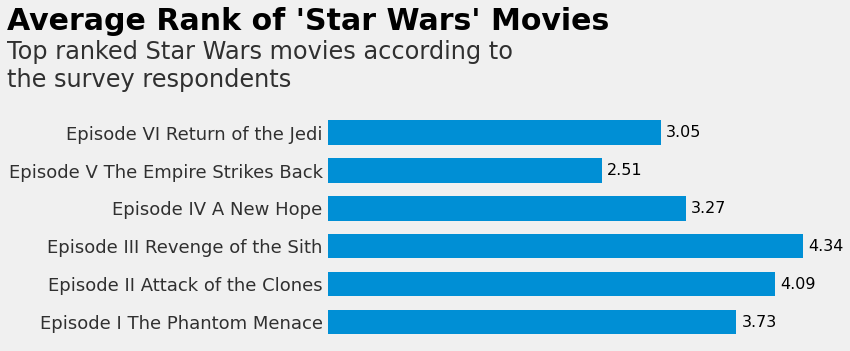

In [16]:
# Set graph style
style.use('fivethirtyeight')

# Create figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Plot horizontal bar graph of 'ranking_mean'
mean_ranking.plot(kind='barh', ax=ax, width=0.65)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks(ax.get_yticks(), fontsize=18, alpha=0.8,
              labels=['Episode I The Phantom Menace', 'Episode II Attack of the Clones',
                      'Episode III Revenge of the Sith', 'Episode IV A New Hope',
                      'Episode V The Empire Strikes Back', 'Episode VI Return of the Jedi'])

# Display bar labels
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=16, fmt='%.2f')

# Add title
ax.text(x=-2.9, y=7.7, fontsize=30, fontweight='bold',
       s='Average Rank of \'Star Wars\' Movies')

# Add subtitle
ax.text(x=-2.9, y=6.2, fontsize=24, alpha=0.8,
       s='Top ranked Star Wars movies according to\nthe survey respondents')

# # Add signature bar
# ax.text(x=-3, y=-1, color='#f0f0f0', fontsize=14, backgroundcolor='#5b5e5f',
#         s=' ©MUHAMMAD AWON' +' '*85 + 'SOURCE: FIVETHIRTYEIGHT STAR WARS SURVEY ')

plt.show()

According to the movies ranking, the lowest score indicates the most favorite, and the highest score is the least favorite movie. So if we look at the results above, `ranking_5` seems to be the most favorite movie that represents the movie `Episode V The Empire Strikes Back`. On the other hand, the lowest rank movie is the `Episode III Revenge of the Sith` from `ranking_3` column.

### Find How Many People Watched Each Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like [pandas.DataFrame.sum()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) or `mean()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

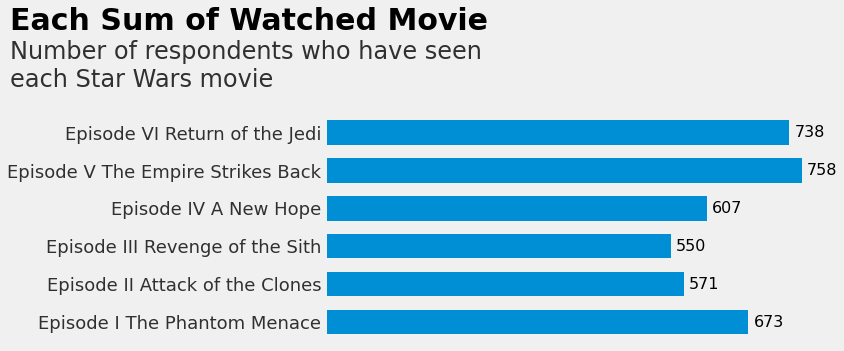

In [17]:
# Create a list of seen columns
seen_cols = star_wars.columns[3:9]

# Compute the sum of each 'seen' columns
sum_seen = star_wars[seen_cols].sum()

# Create figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Plot horizontal bar graph of 'ranking_mean'
sum_seen.plot(kind='barh', ax=ax, width=0.65)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks(ax.get_yticks(), fontsize=18, alpha=0.8,
              labels=['Episode I The Phantom Menace', 'Episode II Attack of the Clones',
                      'Episode III Revenge of the Sith', 'Episode IV A New Hope',
                      'Episode V The Empire Strikes Back', 'Episode VI Return of the Jedi'])

# Display bar labels
ax.bar_label(ax.containers[0], label_type='edge', padding=5, fontsize=16)

# Add title
ax.text(x=-500, y=7.7, fontsize=30, fontweight='bold',
       s='Each Sum of Watched Movie')

# Add subtitle
ax.text(x=-500, y=6.2, fontsize=24, alpha=0.8,
       s='Number of respondents who have seen\neach Star Wars movie')

plt.show()

We can see that 758 out of 1186 survey respondents (`64%`) have seen "Star Wars: Episode V - The Empire Strikes Back" which is the highest among all, while the least number of respondent (`46%`) haven seen "Star Wars: Episode III Revenge of the Sith". Could this be related to how people rank each film? Respondents would most likely rank a movie they have seen than the one they haven't.

Perhaps it would be interesting to explore the respondents who have seen all the movies. Let's take a look at this in the next section.

### Explore the Data by Gender

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
- `Gender` - `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the `Gender` column like this:

```python
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
```

The subset allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

Let's split the data into two gender groups based on the `Gender` column.

In [18]:
# Make subset of 'males' and 'females' groups from 'Gender' column
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

# Calculate the movies ranking in 'males' and 'females' groups 
males_ranking_mean = males[ranking_cols].mean()
females_ranking_mean = females[ranking_cols].mean()

# Calculate the percentage of each movie seen in
# 'males' and 'females' groups 
males_seen_per = round(males[seen_cols].mean() * 100, 1)
females_seen_per = round(females[seen_cols].mean() * 100, 1)

# Display results
print(f'\033[1mMales movies ranking\033[0m:\n{males_ranking_mean}\n')
print(f'\033[1mFemales movies ranking\033[0m:\n{females_ranking_mean}\n')
print(f'\033[1mMales percentage of each seen movie\033[0m:\n{males_seen_per}\n')
print(f'\033[1mFemales percentage of each seen movie\033[0m:\n{females_seen_per}')

Males movies ranking:
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

Females movies ranking:
ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

Males percentage of each seen movie:
seen_1    72.6
seen_2    65.0
seen_3    63.8
seen_4    68.8
seen_5    78.9
seen_6    77.9
dtype: float64

Females percentage of each seen movie:
seen_1    54.3
seen_2    43.2
seen_3    40.4
seen_4    46.4
seen_5    64.3
seen_6    61.6
dtype: float64


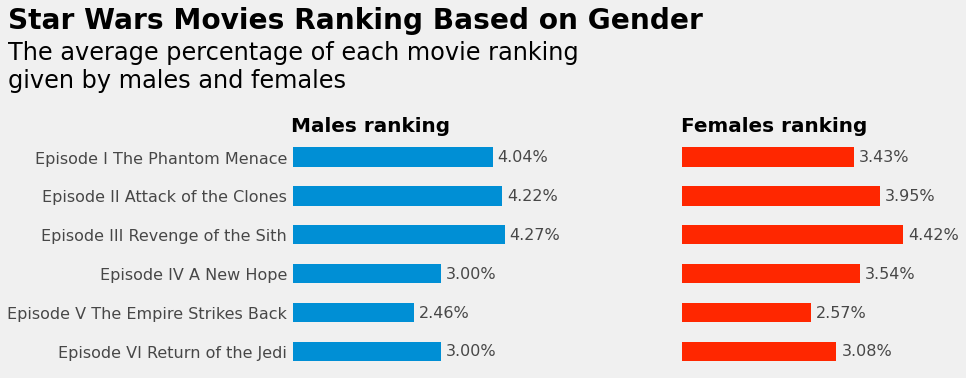

In [19]:
# Define figure and axes for subplots (sharing x-axis)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True)

# Create a horizontal bar plot for 'males_ranking_mean' (also sort the index)
males_ranking_mean.sort_index(ascending=False).plot(kind='barh', left=-1, ax=ax[0], color='#008fd5')
# Add title for males ranking
ax[0].set_title('Males ranking', fontsize=20, fontweight='bold', loc='left')
# Disable grid and xticks
ax[0].grid(False)
ax[0].set_xticks([])
# Create a list for ylabels
ylabels = ['Episode I The Phantom Menace', 'Episode II Attack of the Clones',
          'Episode III Revenge of the Sith', 'Episode IV A New Hope',
          'Episode V The Empire Strikes Back', 'Episode VI Return of the Jedi']
# Set ylabels
ax[0].set_yticks(ax[0].get_yticks(), fontsize=16, alpha=0.7, labels=ylabels[::-1])
# Get bar container
bars = ax[0].containers[0]
# Add bar labels
ax[0].bar_label(bars, label_type='edge', padding=5.0, fontsize=16, alpha=0.7,
                labels=[f'{value:.2f}%' for value in bars.datavalues])


# Create a horizontal bar plot for 'females_ranking_mean'
females_ranking_mean.sort_index(ascending=False).plot(kind='barh', ax=ax[1], color='#ff2700')
# Add title for females ranking
ax[1].set_title('Females ranking', fontsize=20, fontweight='bold', loc='center')
# Disable grid, xticks, and yticks
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
# Get bar2 container
bars2 = ax[1].containers[0]
# Add bar2 labels
ax[1].bar_label(bars2, label_type='edge', padding=5.0, fontsize=16, alpha=0.7,
                labels=[f'{value:.2f}%' for value in bars2.datavalues])

# Add main title
ax[0].text(x=-6.65, y=8.3, s='Star Wars Movies Ranking Based on Gender', fontsize=28, fontweight='bold')

# Add subtitle
ax[0].text(x=-6.65, y=6.8, s='The average percentage of each movie ranking\ngiven by males and females', fontsize=24)

plt.show()

The average value of ranking columns follow the same pattern for both male and female groups, eventhough differ in the frequency count. The highest-ranked movie is "Episode III Revenge of the Sith" between males and females with `4.27%` and `4.42%` respectively. Whereas, the lowest-ranked movie is "Episode V The Empire Strikes Back" scoring `2.46%` for males and `2.57%` for females.

Let's find the most viewed movie for each group.

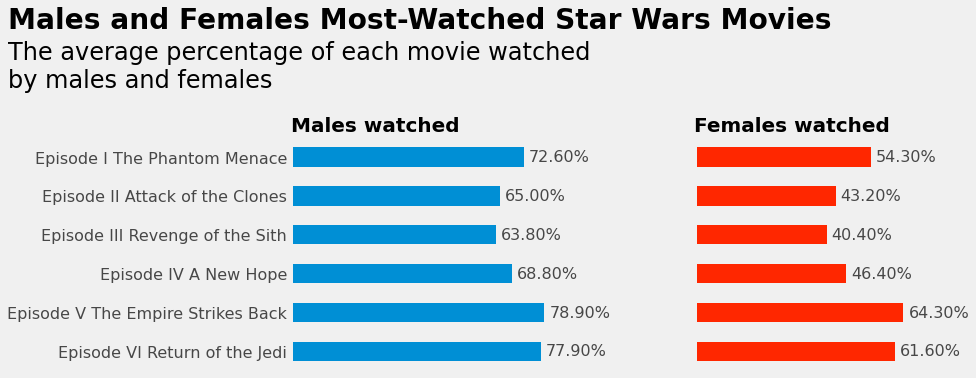

In [20]:
# Define figure and axes for subplots (sharing x-axis)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True)

# Create a horizontal bar plot for 'males_seen_per' (also sort the index)
males_seen_per.sort_index(ascending=False).plot(kind='barh', left=-20, ax=ax[0], color='#008fd5')
ax[0].set_title('Males watched', fontsize=20, fontweight='bold', loc='left')
ax[0].grid(False)
ax[0].set_xticks([])
ylabels = ['Episode I The Phantom Menace', 'Episode II Attack of the Clones',
          'Episode III Revenge of the Sith', 'Episode IV A New Hope',
          'Episode V The Empire Strikes Back', 'Episode VI Return of the Jedi']
ax[0].set_yticks(ax[0].get_yticks(), fontsize=16, alpha=0.7, labels=ylabels[::-1])
bars = ax[0].containers[0]
ax[0].bar_label(bars, label_type='edge', padding=5.0, fontsize=16, alpha=0.7,
                labels=[f'{value:.2f}%' for value in bars.datavalues])


# Create a horizontal bar plot for 'females_seen_per'
females_seen_per.sort_index(ascending=False).plot(kind='barh', ax=ax[1], color='#ff2700')
ax[1].set_title('Females watched', fontsize=20, fontweight='bold', loc='center', x=0.56)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
bars2 = ax[1].containers[0]
ax[1].bar_label(bars2, label_type='edge', padding=5.0, fontsize=16, alpha=0.7,
                labels=[f'{value:.2f}%' for value in bars2.datavalues])

# Add main title
ax[0].text(x=-108, y=8.3, s='Males and Females Most-Watched Star Wars Movies', fontsize=28, fontweight='bold')

# Add subtitle
ax[0].text(x=-108, y=6.8, s='The average percentage of each movie watched\nby males and females', fontsize=24)

plt.show()

There is significant difference between high-ranked and most-viewed movies among the two groups. We expected to have positive correlation between ranked and most-watched movies but that is not the case here. Rather, the most-watched movie is "Episode V The Empire Strikes Back" making it `78.90%` and `64.30%` between male and female group. On the other hand, we see that "Episode III Revenge of the Sith" is not so famous movie. `63.80%` males and `40.40%` females watched that movie.

From these results we can say that it is not necessarily obvious that the highest-ranked moive is also the most-viewed as well and vice versa.

We notice that a large number of male group watched the Star Wars movies as compare to female group. Does that mean males are more interested in Star Wars moives than females? Let's find this out next.

In [21]:
# Calculate the percentage of male star wars fans
male_fans = (males['Do you consider yourself to be a fan of the Star Wars film franchise?']).sum()
male_fans_per = round((male_fans / len(males)) * 100, 2)

# Calculate the percentage of female star wars fans
female_fans = (females['Do you consider yourself to be a fan of the Star Wars film franchise?']).sum()
female_fans_per = round((female_fans / len(females)) * 100, 2)

print(f'\033[1mMale fans percentage\033[0m: {male_fans_per}')
print(f'\033[1mFemale fans percentage\033[0m: {female_fans_per}')

Male fans percentage: 60.97
Female fans percentage: 43.35
